# Breast Cancer Detection

Dataset Name: Breast Cancer Wisconsin (Original) Data Set   
DataSet Reference: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)


Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

### The Aim of the Project is to create an ML that can Classify the cells as either Benign or Malignant from the given Independent Variables.

In [1]:
# Import the relevant libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the DataSet from UCI Repository

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/'
file_name = 'breast-cancer-wisconsin.data'
raw_df = pd.read_csv(url+file_name, header=None) 
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Assign the Column Names

column_names = ['id', 'clump_thickness', 'uniformity_cell_size', 
                   'uniformity_cell_shape', 'marginal_adhesion', 'single_e_cell_size', 
                   'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

raw_df.columns = column_names
raw_df.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# EDA

raw_df.shape

(699, 11)

In [5]:
# Check for missing values in the dataset
raw_df.isnull().sum()

id                       0
clump_thickness          0
uniformity_cell_size     0
uniformity_cell_shape    0
marginal_adhesion        0
single_e_cell_size       0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
dtype: int64

We can see that there are no missing vlaues

In [6]:
# Generate descriptive statistics
raw_df.describe(include='all')

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


We can see that for the column Bare_nuclei, the statistics are not output.   
This happens when the datatype of all / few of the observations is not numerical.    
Let's check the datatype

In [7]:
# Check the Datatype of all the columns
# raw_df.dtypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     699 non-null    int64 
 1   clump_thickness        699 non-null    int64 
 2   uniformity_cell_size   699 non-null    int64 
 3   uniformity_cell_shape  699 non-null    int64 
 4   marginal_adhesion      699 non-null    int64 
 5   single_e_cell_size     699 non-null    int64 
 6   bare_nuclei            699 non-null    object
 7   bland_chromatin        699 non-null    int64 
 8   normal_nucleoli        699 non-null    int64 
 9   mitoses                699 non-null    int64 
 10  class                  699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Pandas Datatypes
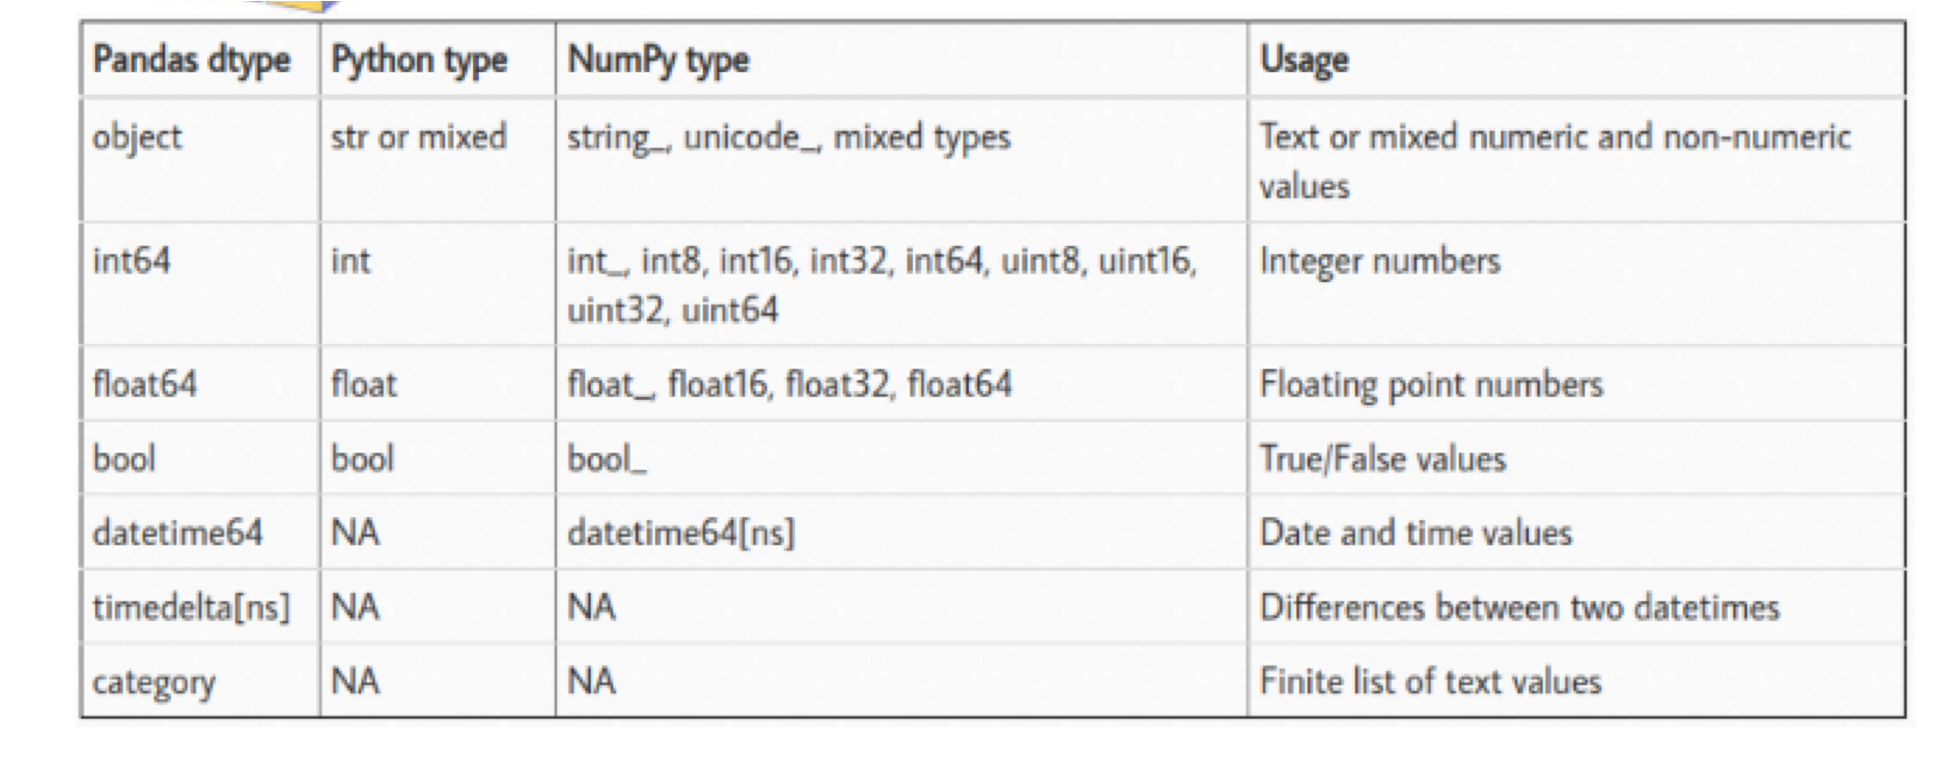

So the datatype of 'Bare_nuclei' is non-numerical and the only way to verify this is by checking all the observations

In [8]:
pd.options.display.max_rows = None
raw_df['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
32      5
33      1
34      1
35      1
36      1
37      1
38     10
39      7
40      ?
41      3
42     10
43      1
44      1
45      1
46      9
47      1
48      1
49      8
50      3
51      4
52      5
53      8
54      8
55      5
56      6
57      1
58     10
59      2
60      3
61      2
62      8
63      2
64      1
65      2
66      1
67     10
68      9
69      1
70      1
71      2
72      1
73     10
74      4
75      2
76      1
77      1
78      3
79      1
80      1
81      1
82      1
83      2
84      9
85      4
86      8
87     10
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      6
99     10


If you scroll through all the observations, we can see that there are few '?'s.

In [9]:
raw_df[raw_df['bare_nuclei'] == '?']

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [10]:
print('Number of observations with "?" for bare_nuclei is: {}'.format(raw_df[raw_df['bare_nuclei'] == '?'].shape[0]))

Number of observations with "?" for bare_nuclei is: 16


Deleting the observations with ? for Bare_nuclei is not a good idea because We will lose some data and also the number of observations is not huge.
Let's impute the missing data by Median values.

You can't calculate Median when the Series (column of the DataFrame) has non-numeric values. So first we convert the ? to nan.    
Then you can calculate the Median

In [11]:
raw_df['bare_nuclei'] = raw_df['bare_nuclei'].replace('?', np.nan)

In [12]:
raw_df['bare_nuclei'] = raw_df['bare_nuclei'].fillna(raw_df['bare_nuclei'].median())

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     699 non-null    int64 
 1   clump_thickness        699 non-null    int64 
 2   uniformity_cell_size   699 non-null    int64 
 3   uniformity_cell_shape  699 non-null    int64 
 4   marginal_adhesion      699 non-null    int64 
 5   single_e_cell_size     699 non-null    int64 
 6   bare_nuclei            699 non-null    object
 7   bland_chromatin        699 non-null    int64 
 8   normal_nucleoli        699 non-null    int64 
 9   mitoses                699 non-null    int64 
 10  class                  699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### We can see that the datatype of Bare_nuclei is still object. We need to convert it to int64 datatype.

In [14]:
raw_df['bare_nuclei'] = raw_df['bare_nuclei'].astype(int)

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   id                     699 non-null    int64
 1   clump_thickness        699 non-null    int64
 2   uniformity_cell_size   699 non-null    int64
 3   uniformity_cell_shape  699 non-null    int64
 4   marginal_adhesion      699 non-null    int64
 5   single_e_cell_size     699 non-null    int64
 6   bare_nuclei            699 non-null    int64
 7   bland_chromatin        699 non-null    int64
 8   normal_nucleoli        699 non-null    int64
 9   mitoses                699 non-null    int64
 10  class                  699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [16]:
# Generate descriptive statistics again to check for the Median Values
raw_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
uniformity_cell_size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
uniformity_cell_shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single_e_cell_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


### For Classification, we don't need the id. It is not an input variable to the ML. So deleting the id column

In [17]:
raw_df = raw_df.drop(['id'], axis=1)
# raw_df.drop('id', axis=1, inplace=True)
raw_df.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [18]:
# Check the number of 2s and 4s in the Class variable.
raw_df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

Text(0.5, 1.0, 'Proportion of Benign and Malignant Cancers')

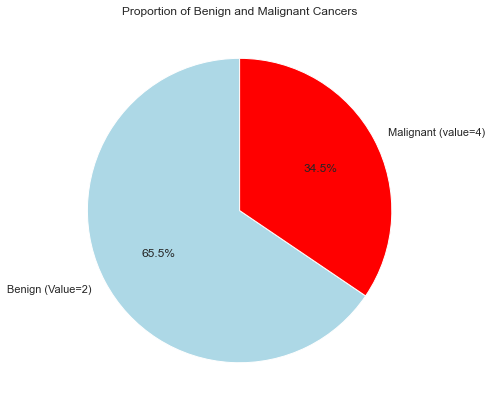

In [19]:
# Create a Pie Plot of the number of 2s and 4s in the Class variable
plt.figure(figsize=(7,7))
plt.pie(raw_df['class'].value_counts(), labels = ['Benign (Value=2)', 
                                                   'Malignant (value=4)'], autopct = '%.1f%%',
       colors = ["lightblue","red"], startangle=90)
plt.title('Proportion of Benign and Malignant Cancers')

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'uniformity_cell_size'}>,
        <AxesSubplot:title={'center':'uniformity_cell_shape'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'single_e_cell_size'}>,
        <AxesSubplot:title={'center':'bare_nuclei'}>],
       [<AxesSubplot:title={'center':'bland_chromatin'}>,
        <AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

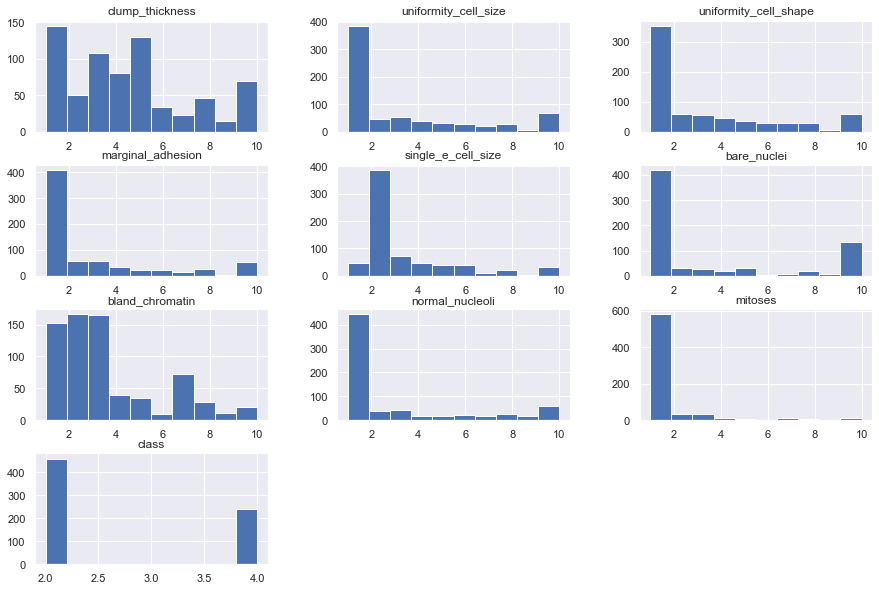

In [20]:
# Frequency Distribution Plots
raw_df.hist(figsize=[15,10])
# x-axis is the frequency

<Figure size 2880x2160 with 0 Axes>

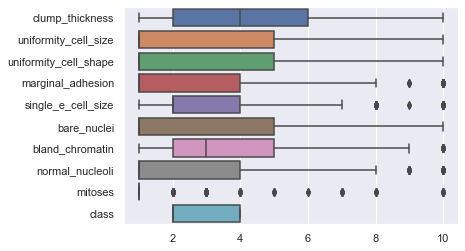

<Figure size 2880x2160 with 0 Axes>

In [21]:
sns.boxplot(data =raw_df, orient='h')
plt.figure(figsize =(40,30))

### We can see from the box plot above that there are few value outside the IQR range (outliers). We will fit a model without removing the outliers. By looking at the Metrics at the end, we will decide if the outliers need to be removed.

In [22]:
for i in range(len(raw_df.columns)):
    print(' The Unique Values in {} are {}'.format(raw_df.columns[i], raw_df[raw_df.columns[i]].unique()))

 The Unique Values in clump_thickness are [ 5  3  6  4  8  1  2  7 10  9]
 The Unique Values in uniformity_cell_size are [ 1  4  8 10  2  3  7  5  6  9]
 The Unique Values in uniformity_cell_shape are [ 1  4  8 10  2  3  5  6  7  9]
 The Unique Values in marginal_adhesion are [ 1  5  3  8 10  4  6  2  9  7]
 The Unique Values in single_e_cell_size are [ 2  7  3  1  6  4  5  8 10  9]
 The Unique Values in bare_nuclei are [ 1 10  2  4  3  9  7  5  8  6]
 The Unique Values in bland_chromatin are [ 3  9  1  2  4  5  7  8  6 10]
 The Unique Values in normal_nucleoli are [ 1  2  7  4  5  3 10  6  9  8]
 The Unique Values in mitoses are [ 1  5  4  2  3  7 10  8  6]
 The Unique Values in class are [2 4]


In [23]:
for i in range(len(raw_df.columns)):
    print(' The No. of values in {} are {}'.format(raw_df.columns[i], len(raw_df[raw_df.columns[i]].unique())))

 The No. of values in clump_thickness are 10
 The No. of values in uniformity_cell_size are 10
 The No. of values in uniformity_cell_shape are 10
 The No. of values in marginal_adhesion are 10
 The No. of values in single_e_cell_size are 10
 The No. of values in bare_nuclei are 10
 The No. of values in bland_chromatin are 10
 The No. of values in normal_nucleoli are 10
 The No. of values in mitoses are 9
 The No. of values in class are 2


<AxesSubplot:>

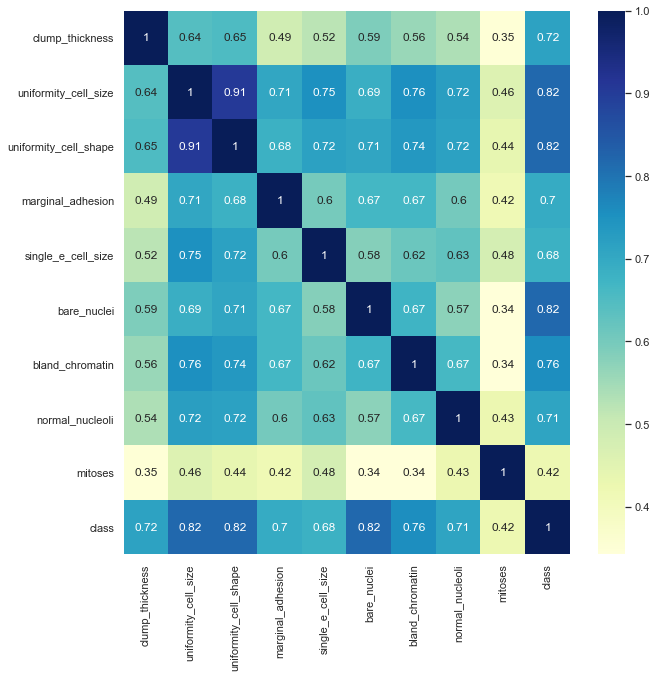

In [24]:
# Generate the Correlation Matrix and Plot it on the HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(raw_df.corr(), cmap='YlGnBu', annot = True)

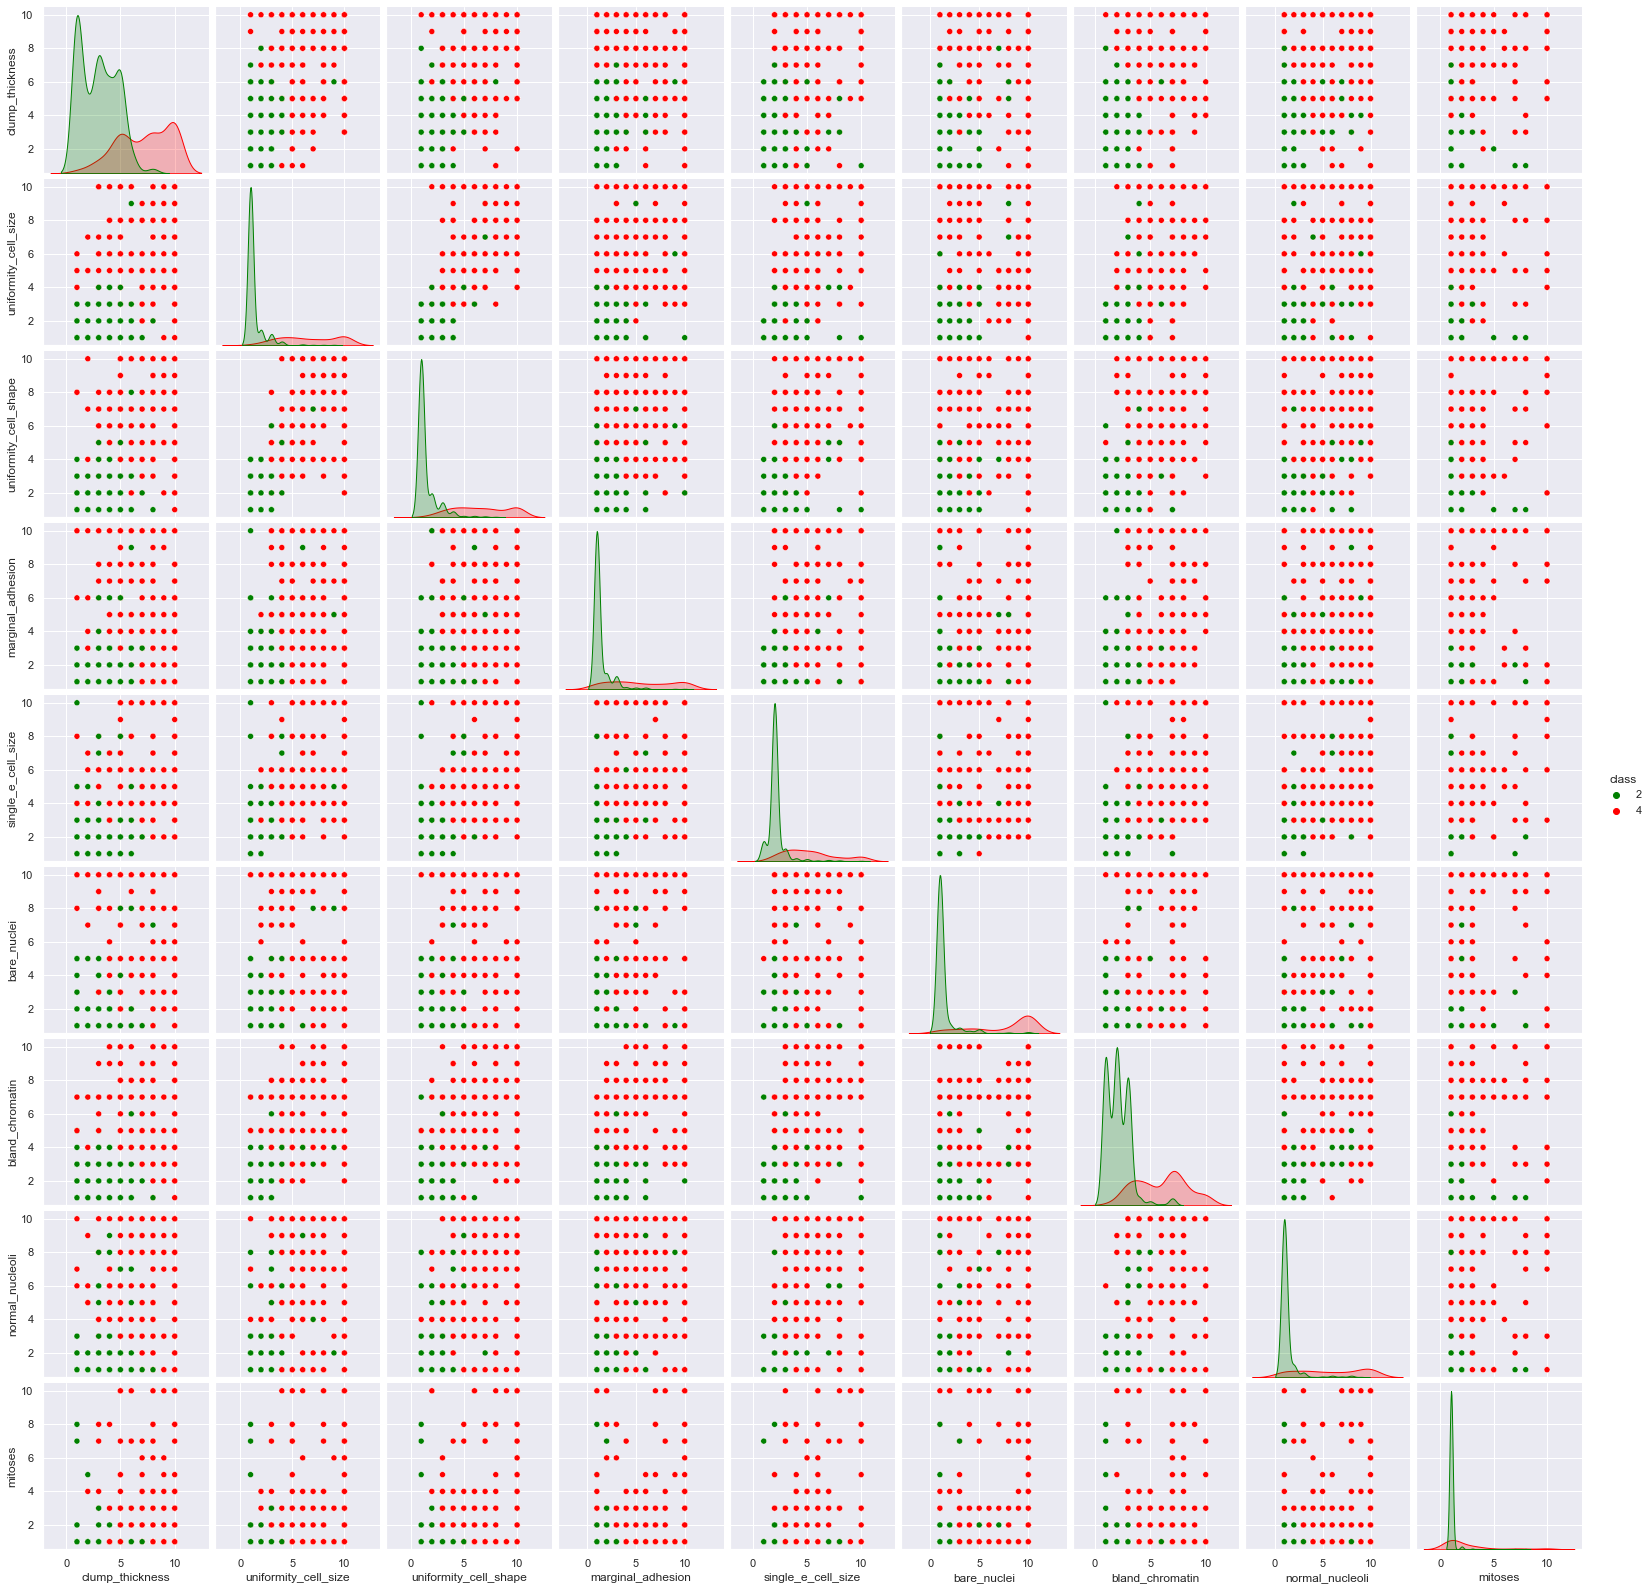

In [25]:
# Let's plot the Pairplot
# Pair plot gives the histogram for the diagonal axis and Scatter plot for off-diagonal axis
# The Y-scale corresponds to the off-diagonal axis plot and not corresponding to the diagonal axis plot.

sns.pairplot(raw_df, hue='class', palette=['green', 'red'])

### Declare Inputs and Targets

In [26]:
target = raw_df['class']
features = raw_df.drop(['class'], axis=1)

In [27]:
# Standardisation is needed to bring all features to a cCommon Scale. 
# Standardisation is needed for Distance based ML Algorithms like PCA, Clustering, KNN, SVM, Lasso & Ridge Regression.
# Standardisation is not significant for Tree Based Algorithms.
# https://builtin.com/data-science/when-and-why-standardize-your-data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

### Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=200)

In [29]:
x_train.shape

(559, 9)

In [30]:
x_test.shape

(140, 9)

In [31]:
print('The size of the Resultant DataFrames is ')
print('x_train: {}' .format(x_train.shape))
print('y_train: {}' .format(y_train.shape))
print('x_test: {}' .format(x_test.shape))
print('y_test: {}' .format(y_test.shape))

The size of the Resultant DataFrames is 
x_train: (559, 9)
y_train: (559,)
x_test: (140, 9)
y_test: (140,)


# Models

### 1. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [62]:
print('Train Data Accuracy Score:', accuracy_score(y_train, logistic_reg.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, logistic_reg.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, logistic_reg.predict(x_test)))
print('')

# print('f1_score', f1_score(y_test, logistic_reg.predict(x_test)))

Train Data Accuracy Score: 0.9713774597495528
Test Data Accuracy Score: 0.9642857142857143

Confusion Matrix:
[[91  4]
 [ 1 44]]



In [55]:
from sklearn.metrics import classification_report

print('classification_report for Logistic Regression')
print(classification_report(y_test, logistic_reg.predict(x_test)))

classification_report for Logistic Regression
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        95
           4       0.92      0.98      0.95        45

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



### 2. KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # The default 'k' value in sklearn.neighbors.KNeighborsClassifier is 5.
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
print('Train Data Accuracy Score:', accuracy_score(y_train, knn.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, knn.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, knn.predict(x_test)))
print('')

# print('f1_score', f1_score(y_test, knn.predict(x_test)))

Train Data Accuracy Score: 0.9803220035778175
Test Data Accuracy Score: 0.9714285714285714

Confusion Matrix:
[[92  3]
 [ 1 44]]



In [54]:
print('classification_report for KNN Classifier')
print(classification_report(y_test, knn.predict(x_test)))

classification_report for KNN Classifier
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        95
           4       0.94      0.98      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



### 3. SVM Classifier

In [51]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(x_train, y_train)

SVC(random_state=0)

In [52]:
print('Train Data Accuracy Score:', accuracy_score(y_train, svm.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, svm.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, svm.predict(x_test)))
print('')

# print('f1_score', f1_score(y_test, svm.predict(x_test)))

Train Data Accuracy Score: 0.9767441860465116
Test Data Accuracy Score: 0.9714285714285714

Confusion Matrix:
[[91  4]
 [ 0 45]]



In [53]:
print('classification_report for SVM Classifier')
print(classification_report(y_test, svm.predict(x_test)))

classification_report for SVM Classifier
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        95
           4       0.92      1.00      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140

